Primer demonstrira podrsku u radu sa rekurentnim neuronskim mrezama Keras biblioteke. Zadatak koji se resava je klasifikacija pregleda IMDB platforme na pozitivne ili negativne preglede. Ovaj zadatak se ustaljeno naziva analiza sentimenata. 

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, SimpleRNN, LSTM
from keras.datasets import imdb
from keras import preprocessing
import keras.backend as K

Using TensorFlow backend.


In [4]:
# Prilikom obrade pregleda nece se razmatrati ceo vokabular (skup svih reci jezika) vec samo npr. 10000 najfrekventnijih reci. 
# Sve reci koje se pojave u pregledima, a nisu u ovom skupu, imace reprezentaciju koja odgovara nepoznatoj reci. To je obicno nula vektor.
max_features = 10000

# Duzina pojedinacnih pregleda se ogranicava na 500 reci.
maxlen = 500

Ucitavaju se skupovi podataka za ucenje i testiranje i pripremaju za dalji rad.

In [5]:
(x_train, y_train), (x_test, y_test)= imdb.load_data(num_words=max_features)

In [6]:
print('Training set shape: {}'.format(x_train.shape))
print('Testing set shape: {}'.format(x_test.shape))

Training set shape: (25000,)
Testing set shape: (25000,)


Nadalje slede primeri dva pregleda - jednog kraceg i jednog duzeg od *maxlen* reci. U pitanju su liste brojeva u kojima svaki od brojeva predstavalja jednu rec. tj njenu poziciju u vokabularu.

In [7]:
print(x_train[2])

[1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5974, 54, 61, 369, 13, 71, 149, 14, 22, 112, 4, 2401, 311, 12, 16, 3711, 33, 75, 43, 1829, 296, 4, 86, 320, 35, 534, 19, 263, 4821, 1301, 4, 1873, 33, 89, 78, 12, 66, 16, 4, 360, 7, 4, 58, 316, 334, 11, 4, 1716, 43, 645, 662, 8, 257, 85, 1200, 42, 1228, 2578, 83, 68, 3912, 15, 36, 165, 1539, 278, 36, 69, 2, 780, 8, 106, 14, 6905, 1338, 18, 6, 22, 12, 215, 28, 610, 40, 6, 87, 326, 23, 2300, 21, 23, 22, 12, 272, 40, 57, 31, 11, 4, 22, 47, 6, 2307, 51, 9, 170, 23, 595, 116, 595, 1352, 13, 191, 79, 638, 89, 2, 14, 9, 8, 106, 607, 624, 35, 534, 6, 227, 7, 129, 113]


In [8]:
print(len(x_train[2]))

141


In [9]:
print(x_train[7])

[1, 4, 2, 716, 4, 65, 7, 4, 689, 4367, 6308, 2343, 4804, 2, 2, 5270, 2, 2315, 2, 2, 2, 2, 4, 2, 628, 7685, 37, 9, 150, 4, 9820, 4069, 11, 2909, 4, 2, 847, 313, 6, 176, 2, 9, 6202, 138, 9, 4434, 19, 4, 96, 183, 26, 4, 192, 15, 27, 5842, 799, 7101, 2, 588, 84, 11, 4, 3231, 152, 339, 5206, 42, 4869, 2, 6293, 345, 4804, 2, 142, 43, 218, 208, 54, 29, 853, 659, 46, 4, 882, 183, 80, 115, 30, 4, 172, 174, 10, 10, 1001, 398, 1001, 1055, 526, 34, 3717, 2, 5262, 2, 17, 4, 6706, 1094, 871, 64, 85, 22, 2030, 1109, 38, 230, 9, 4, 4324, 2, 251, 5056, 1034, 195, 301, 14, 16, 31, 7, 4, 2, 8, 783, 2, 33, 4, 2945, 103, 465, 2, 42, 845, 45, 446, 11, 1895, 19, 184, 76, 32, 4, 5310, 207, 110, 13, 197, 4, 2, 16, 601, 964, 2152, 595, 13, 258, 4, 1730, 66, 338, 55, 5312, 4, 550, 728, 65, 1196, 8, 1839, 61, 1546, 42, 8361, 61, 602, 120, 45, 7304, 6, 320, 786, 99, 196, 2, 786, 5936, 4, 225, 4, 373, 1009, 33, 4, 130, 63, 69, 72, 1104, 46, 1292, 225, 14, 66, 194, 2, 1703, 56, 8, 803, 1004, 6, 2, 155, 11, 4, 2, 323

In [10]:
print(len(x_train[7]))

562


In [11]:
# pad_sequences je funkcija koja se koristi za ujednacavanje duzina sekvenci.
# U zavisnosti od argumenata koji se zadaju, moze dopuniti sekvencu odgovarajucim vrednostima ili je svesti na zeljenu duzinu odsecanjem. 
# U ovom primeru svi pregledi se svode na duzinu maxlen - oni koji su kraci bice dopunjeni nulama, a oni koji su duzi bice skraceni.
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen = maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen = maxlen)

In [12]:
print(x_train.shape)

(25000, 500)


In [13]:
# primer filmskog pregleda nakon skracivanja na duzinu od mexlen reci 
print(x_train[7])

[   4 3231  152  339 5206   42 4869    2 6293  345 4804    2  142   43  218
  208   54   29  853  659   46    4  882  183   80  115   30    4  172  174
   10   10 1001  398 1001 1055  526   34 3717    2 5262    2   17    4 6706
 1094  871   64   85   22 2030 1109   38  230    9    4 4324    2  251 5056
 1034  195  301   14   16   31    7    4    2    8  783    2   33    4 2945
  103  465    2   42  845   45  446   11 1895   19  184   76   32    4 5310
  207  110   13  197    4    2   16  601  964 2152  595   13  258    4 1730
   66  338   55 5312    4  550  728   65 1196    8 1839   61 1546   42 8361
   61  602  120   45 7304    6  320  786   99  196    2  786 5936    4  225
    4  373 1009   33    4  130   63   69   72 1104   46 1292  225   14   66
  194    2 1703   56    8  803 1004    6    2  155   11    4    2 3231   45
  853 2029    8   30    6  117  430   19    6 8941    9   15   66  424    8
 2337  178    9   15   66  424    8 1465  178    9   15   66  142   15    9
  424    8  

In [14]:
print(len(x_train[7]))

500


In [15]:
# primer filmskog pregleda nakon produzavanja do duzine mexlen  
print(x_train[2])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0  

In [16]:
print(len(x_train[2]))

500


Analiza vrednosti ciljne funkcije. Broj pozitivnih i broj negativnih pregleda je isti.

In [17]:
negative = np.sum(y_train == 1)
positive = np.sum(y_train == 0)

In [18]:
print('Number of positive reviews: {}'.format(positive))
print('Number of negative reviews: {}'.format(negative))

Number of positive reviews: 12500
Number of negative reviews: 12500


### Rekurentne neuronske mreze

In [19]:
embedding_dimensionality = 64

In [21]:
model = Sequential()
model.add(Embedding(max_features, embedding_dimensionality, input_length=maxlen))
model.add(SimpleRNN(128))
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 64)           640000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 128)               24704     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 664,833
Trainable params: 664,833
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [129]:
epoches = 5
batch_size = 128

# treniranje mreze traje nesto duze
history = model.fit(x_train, y_train, epochs=epoches, batch_size=batch_size, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 71s 4ms/step - loss: 0.6146 - acc: 0.6612 - val_loss: 0.4973 - val_acc: 0.7814
Epoch 2/5
20000/20000 [==============================] - 71s 4ms/step - loss: 0.3847 - acc: 0.8354 - val_loss: 0.3825 - val_acc: 0.8430
Epoch 3/5
20000/20000 [==============================] - 70s 4ms/step - loss: 0.3127 - acc: 0.8720 - val_loss: 0.4333 - val_acc: 0.8196
Epoch 4/5
20000/20000 [==============================] - 73s 4ms/step - loss: 0.2517 - acc: 0.9012 - val_loss: 0.3894 - val_acc: 0.8586
Epoch 5/5
20000/20000 [==============================] - 75s 4ms/step - loss: 0.1998 - acc: 0.9231 - val_loss: 0.4069 - val_acc: 0.8498


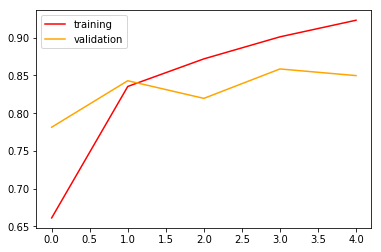

In [131]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(range(epoches), acc, color='red', label='training')
plt.plot(range(epoches), val_acc, color='orange', label='validation')
plt.legend(loc='best')

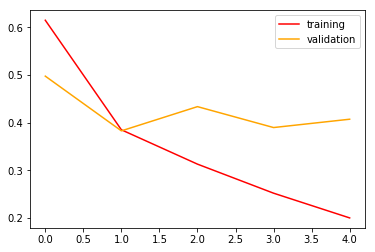

In [132]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(range(epoches), loss, color='red', label='training')
plt.plot(range(epoches), val_loss, color='orange', label='validation')
plt.legend(loc='best')

### LSTM rekurentne neuronske mreze 

<img src='LSTM_cell.png'>

Svojom specificnom strukturom, LSTM celije nude resenje za pracenje dugorocnih zavisnosti na nivou sekvenci koje zbog problema iscezavajucih gradijenata (prakticno) nije bilo moguce sa stanradnim RNN celijama. 
<br>

Ove celije imaju svoje interno stanje, ulaznu kapiju, kapiju za zaboravljanje i izlaznu kapiju kojima, redom, mogu da kontrolisu prisutnost informacija iz prethodnog stanja, njihovu selekciju i generisanju vrednosti koje ce dalje emitovati.

<br> 
Originalni rad je Sepp Hochreiter and Jürgen Schmidhuber, “Long Short-Term Memory,” Neural Computation 9, no. 8 (1997).

In [24]:
K.clear_session()

In [26]:
embedding_dimensionality = 64

In [27]:
model = Sequential()
model.add(Embedding(max_features, embedding_dimensionality, input_length=maxlen))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 64)           640000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 673,089
Trainable params: 673,089
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [30]:
epoches = 5
batch_size = 128

# treniranje mreze traje nesto duze
history = model.fit(x_train, y_train, epochs=epoches, batch_size=batch_size, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 256s 13ms/step - loss: 0.5339 - acc: 0.7481 - val_loss: 0.3736 - val_acc: 0.8556
Epoch 2/5
20000/20000 [==============================] - 220s 11ms/step - loss: 0.3099 - acc: 0.8788 - val_loss: 0.3248 - val_acc: 0.8682
Epoch 3/5
20000/20000 [==============================] - 227s 11ms/step - loss: 0.2540 - acc: 0.9018 - val_loss: 0.3321 - val_acc: 0.8820
Epoch 4/5
20000/20000 [==============================] - 241s 12ms/step - loss: 0.2098 - acc: 0.9210 - val_loss: 0.5197 - val_acc: 0.7870
Epoch 5/5
20000/20000 [==============================] - 232s 12ms/step - loss: 0.1878 - acc: 0.9297 - val_loss: 0.3213 - val_acc: 0.8644


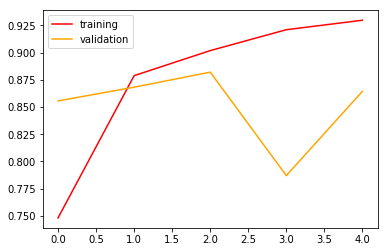

In [31]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(range(epoches), acc, color='red', label='training')
plt.plot(range(epoches), val_acc, color='orange', label='validation')
plt.legend(loc='best')

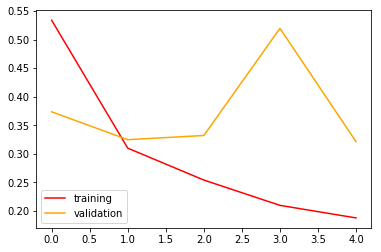

In [32]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(range(epoches), loss, color='red', label='training')
plt.plot(range(epoches), val_loss, color='orange', label='validation')
plt.legend(loc='best')

** Zadatak: ** 
* Ispitati ponasanje mreza koje se duze treniraju. 
* Ispitati ponasanje mreze koje imaju nesto drugacije arhitekture. 

** Koriscena literatura: **
* Deep Learning with Python, Francois Chollet
* LSTM: 
<br>
http://colah.github.io/posts/2015-08-Understanding-LSTMs/
* Coursera, Deep learning Specialization - Sequence Modeling (part 5):
<br>
https://www.coursera.org/specializations/deep-learning (video lekcije su dostupne na YouTube-u)